<a href="https://www.kaggle.com/code/lucasscaldaferrii/an-lise-de-cr-dito?scriptVersionId=124837949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

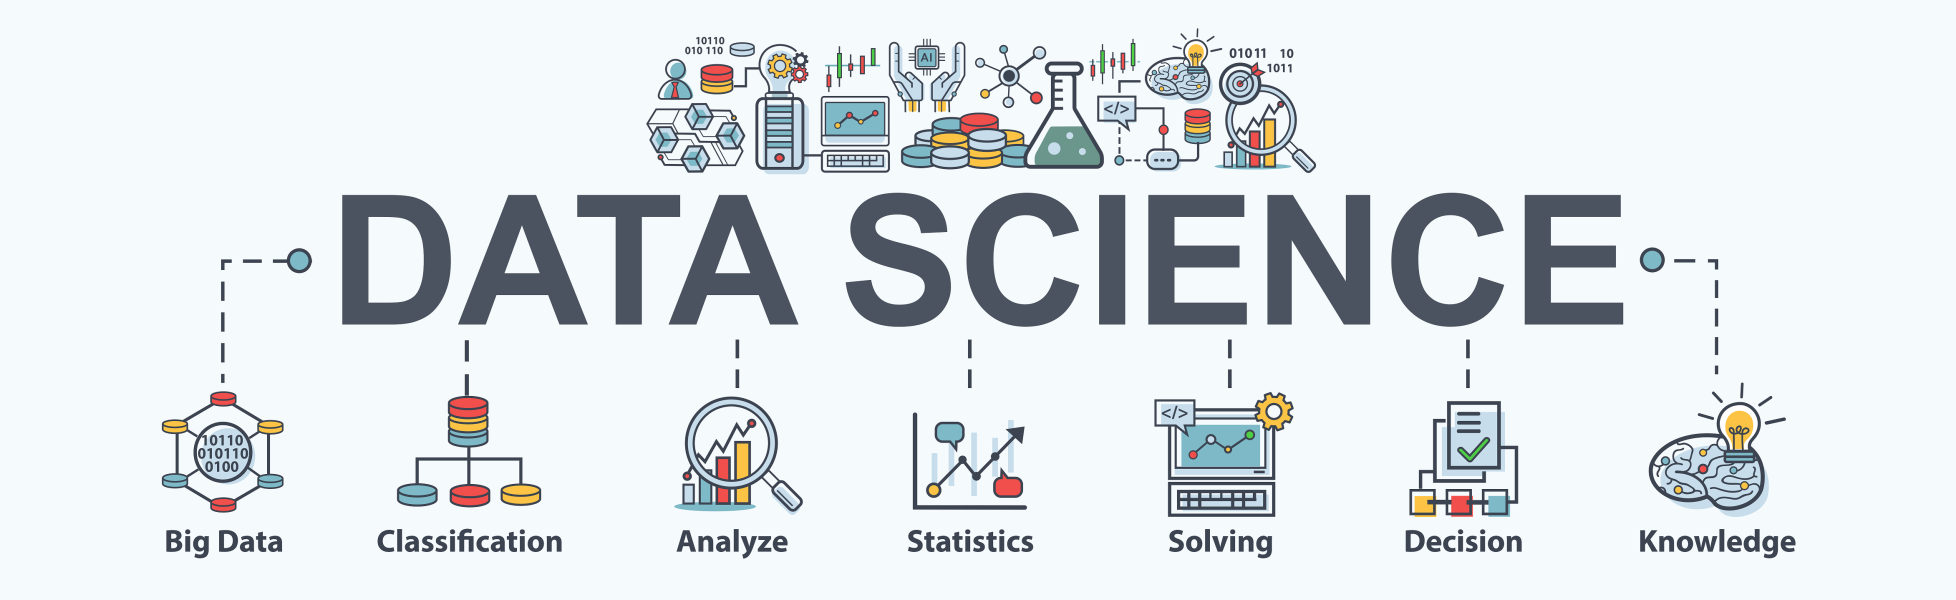

---



# **Projeto:**<br>

Análise sobre concessão de crédito a clientes <br>
[Lucas Scaldaferri](http://https://www.linkedin.com/in/0scaldaferri-lucas/)<br>
---


# **Tópicos**

1. Introdução
2. Impressões Iniciais <br>
    2.1. Descrição dos Atributos <br>
    2.2. Leitura e Reconhecimento dos Dados <br>
    2.3. Conhecendo a estrutura do conjunto de dados <br>
    2.4. Schema <br>
    2.5. Dados Faltantes <br>
    2.6. Principais observações sobre as impressões iniciais
3. Transformação e Limpeza dos Dados <br>
    3.1. Correção de Schema <br>
    3.2. Remoção dos Dados Faltantes
4. Visualização dos Dados <br>
    4.1. Visualizações Categóricas <br>
    4.2. Visualizações Numéricas <br>
5. Insights

# 1. Introdução

Neste projeto será realizado uma análise sobre concessão de crédito a clientes. Portanto, através de um conjunto de dados será realizada uma exploração e análise de todos os dados disponíveis, com o objetivo de desenvolver compreensão, extrair conhecimento e formular ações que gerem resultados. <br>
Existem diversos métodos de análise desses dados, mas, aqui, iremos focar no uso da linguagem Python.

# 2. Impressões iniciais

Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente (default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

## 2.1. Descrição dos Atributos

Breve descrição do que cada coluna no conjunto de dados representa.

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

## 2.2. Leitura e Reconhecimento dos Dados

 Inicialmente será realizado a leitura dos dados num dataframe pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

credit_data = pd.read_csv('/kaggle/input/public/credito.csv', na_values = 'na')
credit_data.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## 2.3. Conhecendo a estrutura do conjunto de dados

Com os dados disponíveis para iteração, torna-se possível conhecer um pouco melhor a estrutura do conjunto de dados.

In [2]:
credit_data.shape

(10127, 16)

In [3]:
credit_data[credit_data['default'] == 0].shape

(8500, 16)

In [4]:
credit_data[credit_data['default'] == 1].shape

(1627, 16)

In [5]:
qtd_total, _ = credit_data.shape
qtd_adimplentes, _ = credit_data[credit_data['default'] == 0].shape
qtd_inadimplentes, _ = credit_data[credit_data['default'] == 1].shape

print(f'A proporcão clientes adimplentes é de {round(100 * (qtd_adimplentes / qtd_total), 2)}%')
print(f'A proporcão clientes inadimplentes é de {round(100 * (qtd_inadimplentes / qtd_total), 2)}%')

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


## 2.4. Schema
Verificação dos dados para realacionar o assunto tratado por uma coluna com o tipo do dado presente nela, ou seja, se tem sentido na informação presente.

In [6]:
credit_data.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [7]:
credit_data.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [8]:
credit_data.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


## 2.5. Dados Faltantes
Verificação dos dados faltantes e o que pode ser feito para amenizá-los.

In [9]:
credit_data.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [10]:
def stats_dados_faltantes(credit_data: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in credit_data.columns:
    if credit_data[col].isna().any():
      qtd, _ = credit_data[credit_data[col].isna()].shape
      total, _ = credit_data.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * (qtd / total), 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [11]:
stats_dados_faltantes(credit_data=credit_data)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [12]:
stats_dados_faltantes(credit_data=credit_data[credit_data['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [13]:
stats_dados_faltantes(credit_data=credit_data[credit_data['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 2.6. Principais observações sobre as impressões iniciais

* Através da exploração dos dados foi possível:

    * Entender a estrutura do conjunto de dados;
    * Verificar o schema; 
    * Analisar os dados faltantes;


* Pelo schema foi detectado que as colunas de limite de crédito e valor de transação estão com o tipo errado por conta da forma em que estão representados;
* Foi observado dados faltantes nas colunas escolaridade, estado civil e salário anual que precisaram ser tratados.

# 3. Transformação e Limpeza dos Dados

Agora que se conhece melhor a natureza do conjunto de dados, é possível realizar a transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Desta forma, torna-se necessário corrigir o schema das colunas e remover os dados faltantes.

## 3.1. Correção de Schema
Como foi observado na etapa de exploração, que as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categóricas (object), torna-se necessário realizar a limpeza dos dados.

In [14]:
credit_data[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [15]:
credit_data[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [16]:
credit_data['valor_transacoes_12m'] = credit_data['valor_transacoes_12m'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))
credit_data['limite_credito'] = credit_data['limite_credito'].apply(lambda valor: float(valor.replace(".", "").replace(",", ".")))

In [17]:
credit_data.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [18]:
credit_data.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [19]:
credit_data.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


## 3.2. Remoção dos Dados Faltantes
A remoção das linhas problemáticas é trivial, porém, deve ser realizado uma análise para verificar se haverá uma proporcionalidade dos dados antes e depois da remoção, ou seja, qual o impacto da remoção no conjunto de dados.

In [20]:
credit_data.dropna(inplace=True)

In [21]:
credit_data.shape

(7081, 16)

In [22]:
credit_data[credit_data['default'] == 0].shape

(5968, 16)

In [23]:
credit_data[credit_data['default'] == 1].shape

(1113, 16)

In [24]:
qtd_total_novo, _ = credit_data.shape
qtd_adimplentes_novo, _ = credit_data[credit_data['default'] == 0].shape
qtd_inadimplentes_novo, _ = credit_data[credit_data['default'] == 1].shape

In [25]:
print(f"Antes:  Proporcão de clientes adimplentes era de {round(100 * (qtd_adimplentes / qtd_total), 2)}%")
print(f"Depois: Proporcão de clientes adimplentes é   de {round(100 * (qtd_adimplentes_novo / qtd_total_novo), 2)}%")
print("")
print(f"Antes:  Proporcão de clientes inadimplentes era de {round(100 * (qtd_inadimplentes / qtd_total), 2)}%")
print(f"Depois: Proporcão de clientes inadimplentes é   de {round(100 * (qtd_inadimplentes_novo / qtd_total_novo), 2)}%")

Antes:  Proporcão de clientes adimplentes era de 83.93%
Depois: Proporcão de clientes adimplentes é   de 84.28%

Antes:  Proporcão de clientes inadimplentes era de 16.07%
Depois: Proporcão de clientes inadimplentes é   de 15.72%


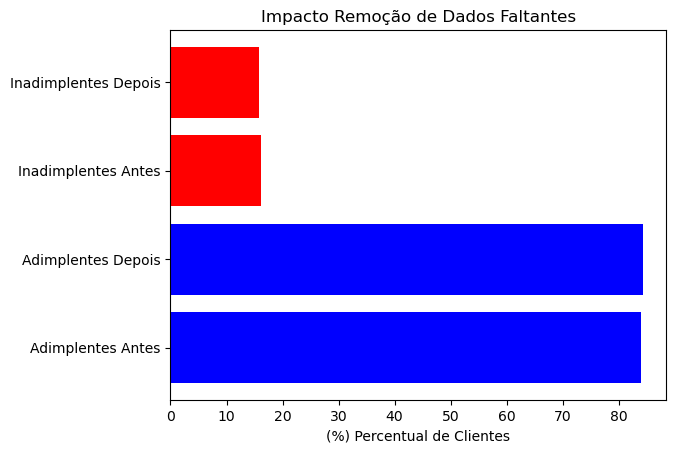

In [26]:
labels = ['Adimplentes Antes', 'Adimplentes Depois', 'Inadimplentes Antes', 'Inadimplentes Depois']
vals = [(round(100 * (qtd_adimplentes / qtd_total), 2)), (round(100 * (qtd_adimplentes_novo / qtd_total_novo), 2)), (round(100 * (qtd_inadimplentes / qtd_total), 2)), (round(100 * (qtd_inadimplentes_novo / qtd_total_novo), 2))]

fig, ax = plt.subplots()
ax.barh(labels, vals, color=['blue','blue', 'red', 'red'])

ax.set_title('Impacto Remoção de Dados Faltantes')
ax.set_xlabel('(%) Percentual de Clientes')

plt.show()

# 4. Visualização dos Dados

Com os dados estão prontos, é possível analisá-los a fim de buscar entender qual fator leva um cliente a inadimplencia.

In [27]:
sns.set_style("whitegrid")

In [28]:
credit_data_adimplente = credit_data[credit_data['default'] == 0]
credit_data_inadimplente = credit_data[credit_data['default'] == 1]

## 4.1 Visualizações Categóricas
Nesta seção, será visualizado a relação entre a variável resposta **default** com os atributos categóricos.

In [29]:
credit_data.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* Escolaridade

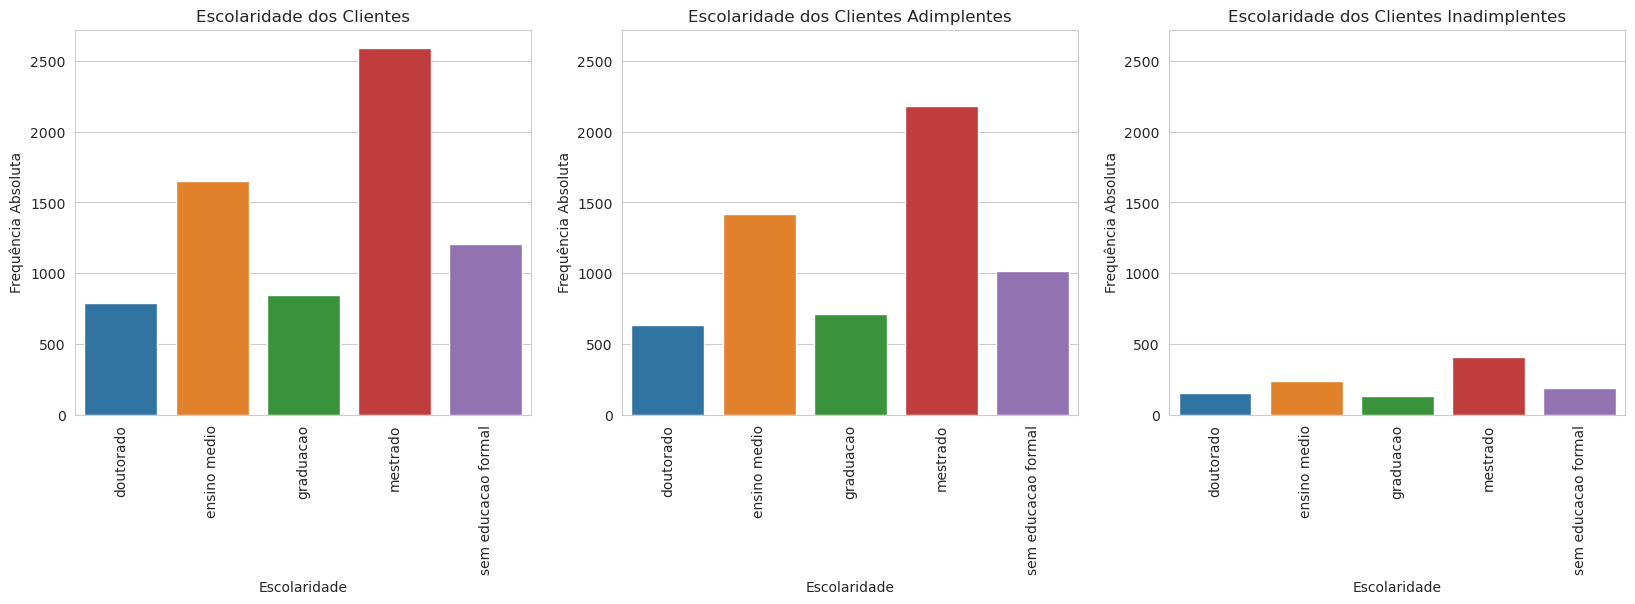

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = credit_data.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credit_data, credit_data_adimplente, credit_data_inadimplente]:

  credit_data_to_plot = dataframe[coluna].value_counts().to_frame()
  credit_data_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  credit_data_to_plot[coluna] = credit_data_to_plot.index
  credit_data_to_plot.sort_values(by=[coluna], inplace=True)
  credit_data_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=credit_data_to_plot[coluna], y=credit_data_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Salário Anual

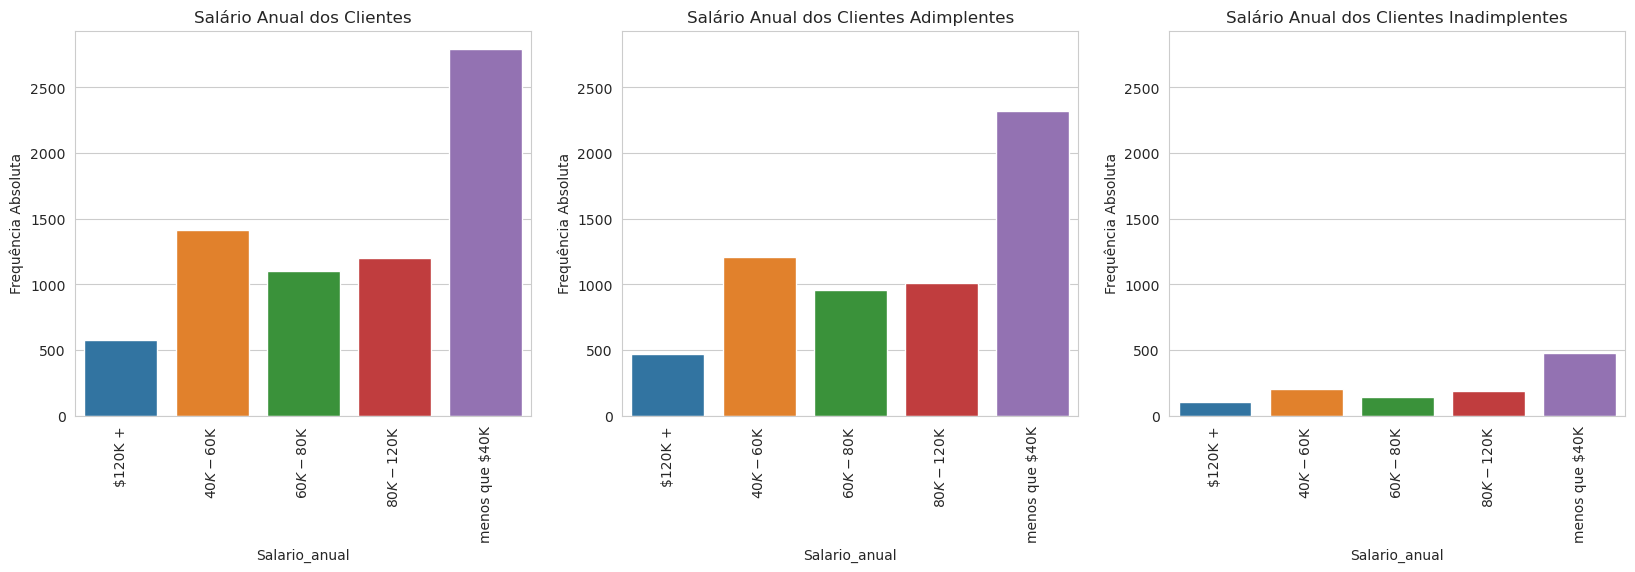

In [31]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credit_data, credit_data_adimplente, credit_data_inadimplente]:

  credit_data_to_plot = dataframe[coluna].value_counts().to_frame()
  credit_data_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  credit_data_to_plot[coluna] = credit_data_to_plot.index
  credit_data_to_plot.reset_index(inplace=True, drop=True)
  credit_data_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=credit_data_to_plot[coluna], y=credit_data_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

## 4.2 Visualizações Numéricas
Nesta seção, será visualizado a relação entre a variável resposta **default** com os atributos numéricos.

In [32]:
credit_data.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* Quantidade de Transações nos Últimos 12 Meses

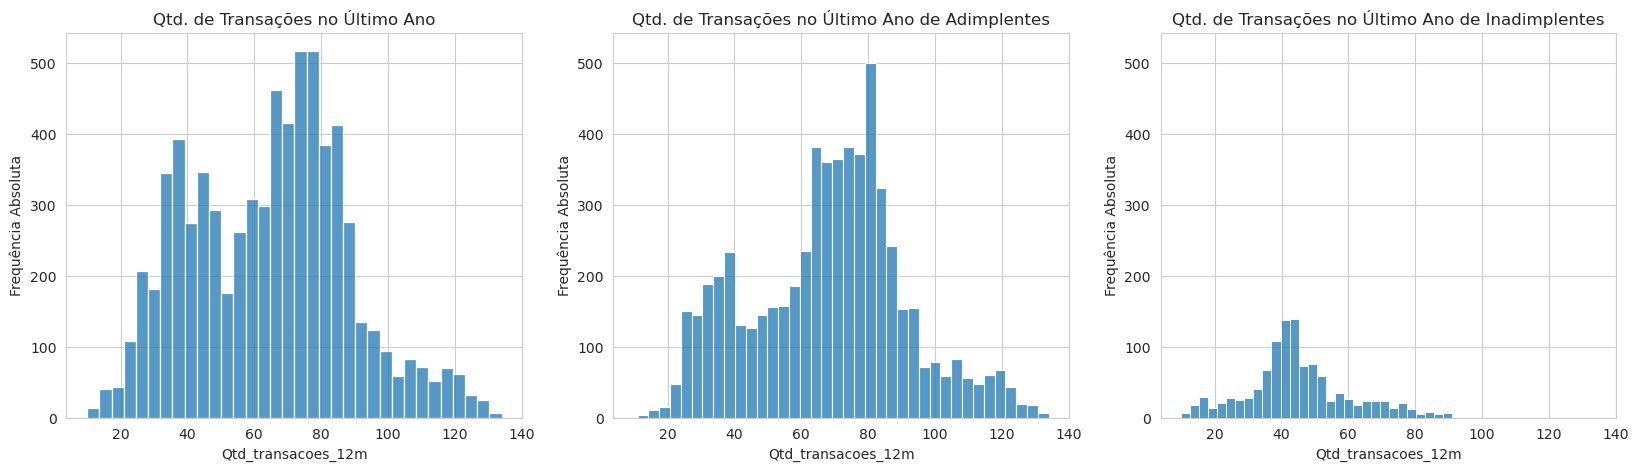

In [33]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credit_data, credit_data_adimplente, credit_data_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Valor das Transações nos Últimos 12 Meses

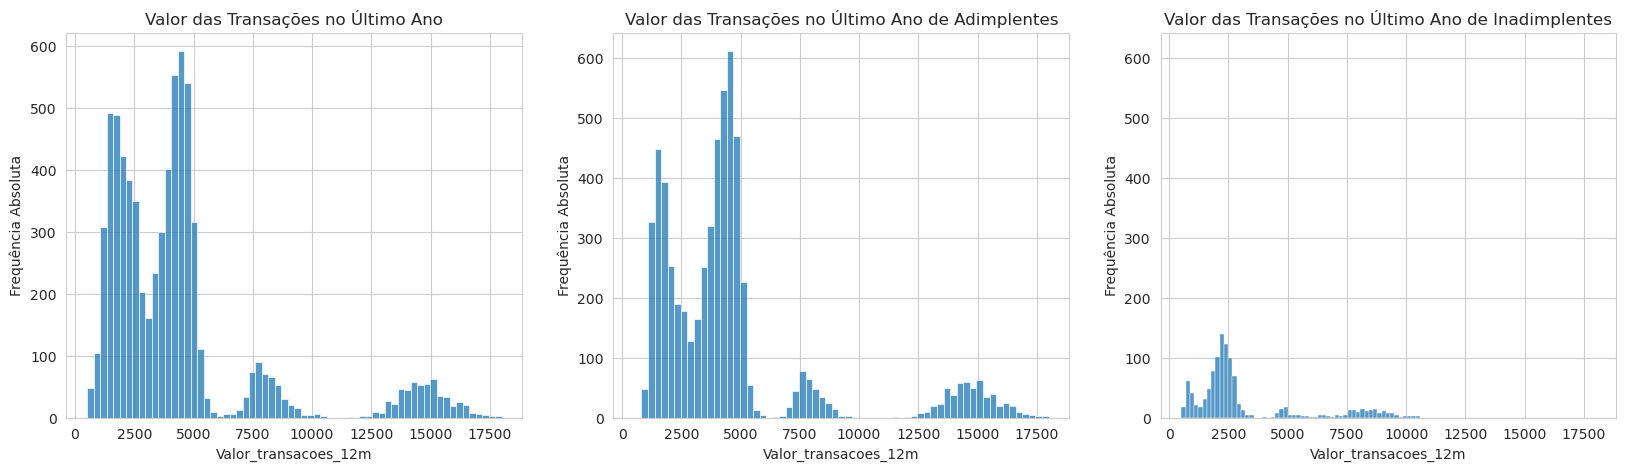

In [34]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [credit_data, credit_data_adimplente, credit_data_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

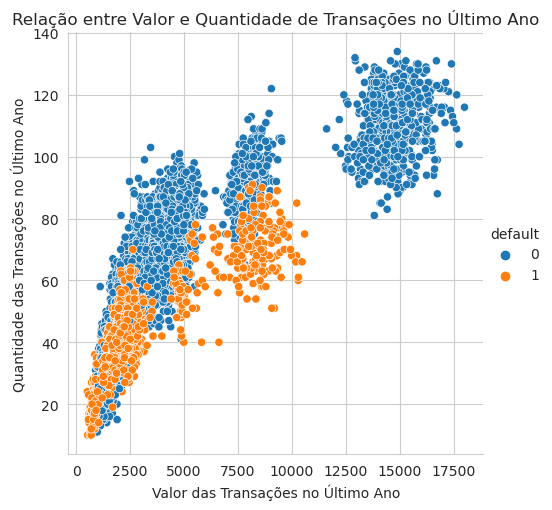

In [35]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=credit_data, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# 5. Insights


O objetivo do projeto é compreender e identificar como um cliente adimplente se torna inadimplente, e desta forma, buscar o padrão presente nos dados que possam explicar essas ocorrências. Sendo assim, torna-se possível formular ações que gerem resultados e entregam insights (informação, conhecimento e valor) para os tomadores de decisão.

oferecer algum tipo de serviço especial ou entrar em contato com aqueles clientes para buscar conhecimento sobre sua situação com a empresa.

* A variável quantidade de transações nos últimos 12 meses demonstrou:

    * Em geral, os clientes transacionam em dois intervalos: (20 e 40) & (60 e 80);
    * Todavia, os clientes adimplentes trasacionam nos últimos 12 meses com mais frequencia entre 60 e 80 transações;
    * O pico de clientes inadimplentes está entre 20 e 60 transações nos últimos 12 meses, 


* A variável valor das transações nos últimos 12 meses demonstrou:

    * Em geral, o valor das transações está muito concentrado entre 1.000,00 reais e 5.000,00 reais.
    * Clientes inadimplentes estão apresentando padrão de comportamento onde o valor de transação nos últimos 12 meses é muito próximo de 1.500,00 reais a 2.500,00 reais.
    
Diante dos fatos e dados apresentados, conclui-se que se a empresa tem clientes com transações muito concentradas nos últimos 12 meses entre 20 e 60 e existe uma grande possibilidade de que eles venham a se tornar inadimplentes. Outro ponto a se destacar é o valor de transação nos últimos 12 meses muito próximo de R$ 1.500,00 a R$ 2.500,00. Este comportamento possui alta probabilidade de inadimplência. 

Sendo assim, recomenda-se acompanhar de perto os clientes que apresentam esses dois tipos de comportamento para tentar evitar a inadimplência.